In [21]:
import os
import kagglehub
path = kagglehub.dataset_download("mohamedmaher5/vehicle-classification")
print("Path to dataset files:", path)

# Function to show directory structure
def show_structure(root, max_depth=2):
    root = os.path.abspath(root)
    root_depth = root.count(os.sep)
    for dirpath, dirnames, filenames in os.walk(root):
        depth = dirpath.count(os.sep) - root_depth
        if depth > max_depth:
            dirnames[:] = []
            continue
        indent = "  " * depth
        print(f"{indent}- {os.path.basename(dirpath)}")
show_structure(path, max_depth=3)


Using Colab cache for faster access to the 'vehicle-classification' dataset.
Path to dataset files: /kaggle/input/vehicle-classification
- vehicle-classification
  - Vehicles
    - Ships
    - Cars
    - Motorcycles
    - Bikes
    - Trains
    - Auto Rickshaws
    - Planes



Class: Auto Rickshaws (800 images)


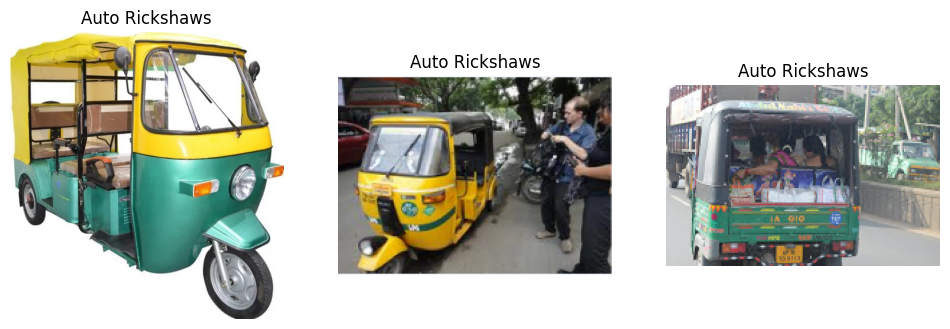


Class: Bikes (800 images)


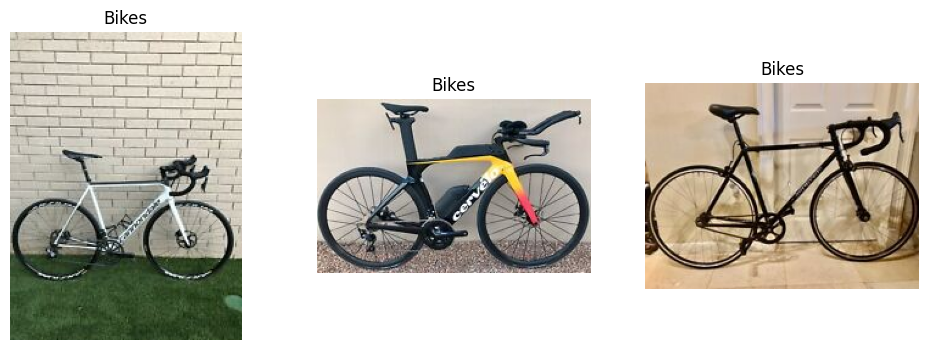


Class: Cars (790 images)


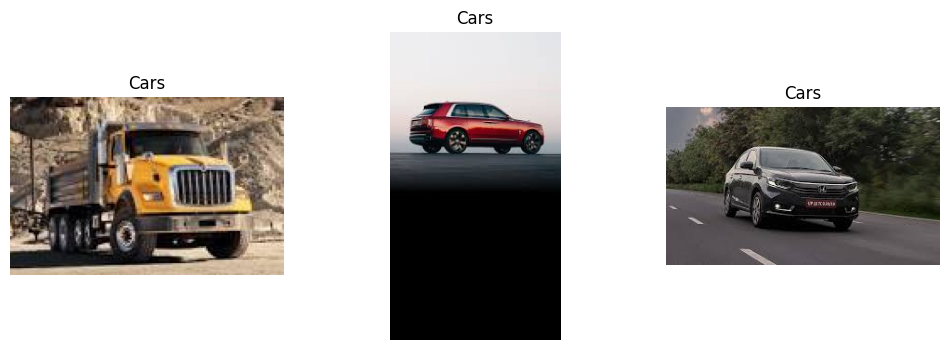


Class: Motorcycles (800 images)


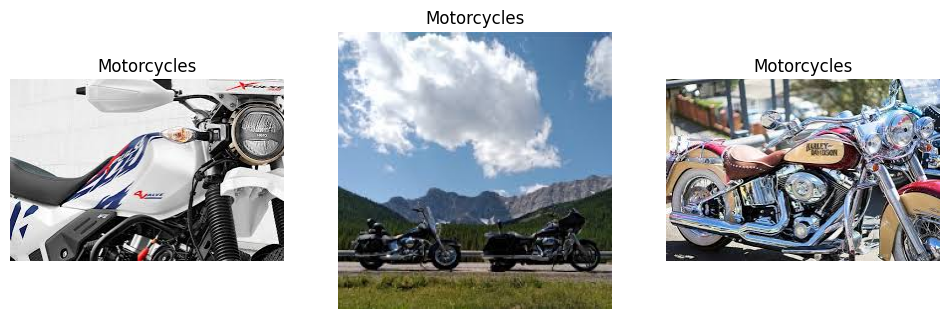


Class: Planes (797 images)


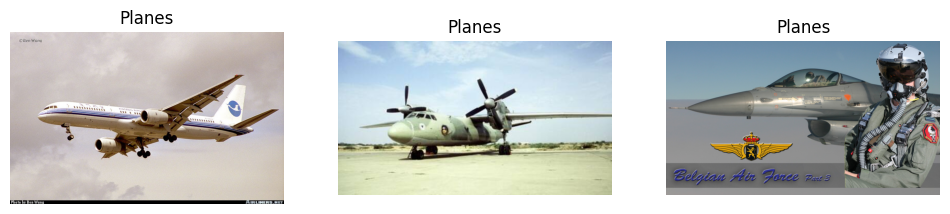


Class: Ships (800 images)


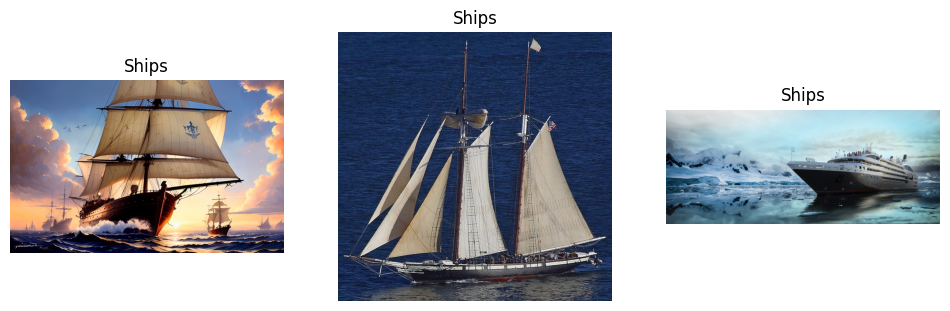


Class: Trains (800 images)


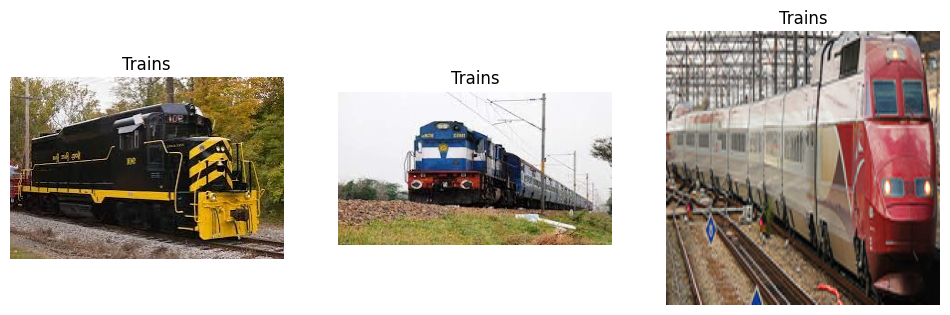

In [22]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_random_images(root, n=3):
    # go into "Vehicles" folder
    vehicles_root = os.path.join(root, "Vehicles")

    for class_name in sorted(os.listdir(vehicles_root)):
        class_path = os.path.join(vehicles_root, class_name)
        if not os.path.isdir(class_path):
            continue

        images = [os.path.join(class_path, f) for f in os.listdir(class_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        sample_imgs = random.sample(images, min(n, len(images)))

        print(f"\nClass: {class_name} ({len(images)} images)")
        plt.figure(figsize=(12, 4))
        for i, img_path in enumerate(sample_imgs):
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis("off")
        plt.show()
show_random_images(path, n=3)


In [23]:
def count_images_per_class(root):
    vehicles_root = os.path.join(root, "Vehicles")
    counts = {}
    for class_name in os.listdir(vehicles_root):
        class_path = os.path.join(vehicles_root, class_name)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg','.png'))]
        counts[class_name] = len(images)
    return counts

counts = count_images_per_class(path)
print(counts)


{'Ships': 800, 'Cars': 790, 'Motorcycles': 800, 'Bikes': 800, 'Trains': 800, 'Auto Rickshaws': 800, 'Planes': 797}
